# Nutrition, Physical Activity, and Obesity - Behavioral Risk Factor Surveillance System

The data used here is from Data.gov, managed and hosted by the U.S. General Services Administration, Technology Transformation Service (https://catalog.data.gov)

The dataset includes data on adult's diet, physical activity, and weight status from Behavioral Risk Factor Surveillance System. This data is used for DNPAO's Data, ...

## Setup

First we need to import the some libraries

In [1]:
import json
import sys
from importnb import Notebook
from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

from xnd import xnd

In [2]:
sys.path.insert(0, 'utils')

In [3]:
with Notebook(): 
    from json_processing import (
        get_xnd_type, json_cleaning, json_meta_type, json_normalize
    )

In [4]:
def walk(G, node):
    if isinstance(node, dict):
        for key, item in node.items():
            if isinstance(item, dict):
                for j in item.keys():
                    G.add_edge(key, j)
                walk(G, item)
    if isinstance(node, list):
        walk(G, node[0])
    return
            
def gen_graph(data):
    G = nx.Graph()
    
    for key in data.keys():
        G.add_edge('ROOT', key)

    walk(G, data)
    
    return G

In [5]:
test_data = {
    'tree': {
        'leaf1': [1, 2],
        'leaf2': [2, 4]}, 
    'cars': [
        {'model': 'model1', 'year': 2010},
        {'model': 'model2', 'color': 'blue'},
        {'ports': {'numbers': 4}}
    ]
}

In [6]:
test_data_clean = json_cleaning(test_data)
test_data_clean

{'tree': {'leaf1': [1, 2], 'leaf2': [2, 4]},
 'cars': [{'model': 'model1', 'year': 2010},
  {'model': 'model2', 'color': 'blue'},
  {'ports': {'numbers': 4}}]}

In [7]:
test_data_norm = json_normalize(test_data_clean)
test_data_norm

{'tree': {'leaf1': [1, 2], 'leaf2': [2, 4]},
 'cars': [{'model': 'model1',
   'year': 2010,
   'color': None,
   'ports': {'numbers': None}},
  {'model': 'model2',
   'color': 'blue',
   'year': None,
   'ports': {'numbers': None}},
  {'ports': {'numbers': 4}, 'model': None, 'year': None, 'color': None}]}

In [8]:
meta_type = json_meta_type(test_data_norm, True)
meta_type

{'tree': {'value_type': dict,
  'nullable': True,
  'value': {'leaf1': {'value_type': list,
    'nullable': True,
    'count': 2,
    'value': int},
   'leaf2': {'value_type': list, 'nullable': True, 'count': 2, 'value': int}}},
 'cars': {'value_type': dict,
  'nullable': True,
  'count': 3,
  'value': {'model': {'nullable': True, 'value_type': str},
   'year': {'nullable': True, 'value_type': int},
   'color': {'nullable': True, 'value_type': str},
   'ports': {'nullable': True,
    'value_type': dict,
    'value': {'numbers': {'value_type': int, 'nullable': True}}}}}}

In [9]:
test_type = get_xnd_type(meta_type)
test_type

'{tree: ?{leaf1: 2 * ?int64, leaf2: 2 * ?int64}, cars: 3 * ?{model: ?string, year: ?int64, color: ?string, ports: ?{numbers: ?int64}}}'

In [10]:
xnd(test_data_norm, type=test_type)

xnd({'tree': {'leaf1': [1, 2], 'leaf2': [2, 4]},
     'cars': [{'model': 'model1', 'year': 2010, 'color': None, 'ports': {'numbers': None}},
      {'model': 'model2', 'year': None, 'color': 'blue', 'ports': {'numbers': None}},
      {'model': None, 'year': None, 'color': None, 'ports': {'numbers': 4}}]},
    type='{tree : ?{leaf1 : 2 * ?int64, leaf2 : 2 * ?int64}, cars : 3 * ?{model : ?string, year : ?int64, color : ?string, ports : ?{numbers : ?int64}}}')

## Loading Data

The data for this tutorial could be downloaded at https://chronicdata.cdc.gov/views/hn4x-zwk7/rows.json?accessType=DOWNLOAD

We already have this data at `data/data-gov-nutrition.json`

In [11]:
with open('data/data-gov-nutrition.json') as f:
    data = json_cleaning(json.load(f))

In [12]:
str_summary = str(data)[:500] + '...'
print(str_summary.replace(', ', ',\n'))

{'meta': {'view': {'id': 'hn4x-zwk7',
'name': 'Nutrition,
Physical Activity,
and Obesity - Behavioral Risk Factor Surveillance System',
'attribution': 'Centers for Disease Control and Prevention (CDC),
National Center for Chronic Disease Prevention and Health Promotion,
Division of Nutrition,
Physical Activity,
and Obesity',
'attributionLink': 'http://www.cdc.gov/nccdphp/DNPAO/index.html',
'averageRating': 0,
'category': 'Nutrition,
Physical Activity,
and Obesity',
'createdAt': 1469123618,
'desc...


In [13]:
try:
    xnd(data)
except Exception as e:
    display(e)

ValueError('dtype mismatch: have {id: int64, name: string, dataTypeName: string, fieldName: string, position: int64, renderTypeName: string, format: {}, flags: 1 * string} and {id: int64, name: string, dataTypeName: string, description: string, fieldName: string, position: int64, renderTypeName: string, tableColumnId: int64, width: int64, cachedContents: {largest: string, non_null: int64, average: string, null: int64, top: 6 * {item: string, count: int64}, smallest: string, sum: string}, format: {precisionStyle: string, noCommas: string, align: string}}')

In [14]:
data_clean = json_cleaning(data)
data_norm = json_normalize(data_clean)

In [15]:
meta = json_meta_type(data_norm, True)
meta

{'meta': {'value_type': dict,
  'nullable': True,
  'value': {'view': {'value_type': dict,
    'nullable': True,
    'value': {'id': {'value_type': str, 'nullable': True},
     'name': {'value_type': str, 'nullable': True},
     'attribution': {'value_type': str, 'nullable': True},
     'attributionLink': {'value_type': str, 'nullable': True},
     'averageRating': {'value_type': int, 'nullable': True},
     'category': {'value_type': str, 'nullable': True},
     'createdAt': {'value_type': int, 'nullable': True},
     'description': {'value_type': str, 'nullable': True},
     'displayType': {'value_type': str, 'nullable': True},
     'downloadCount': {'value_type': int, 'nullable': True},
     'hideFromCatalog': {'value_type': bool, 'nullable': True},
     'hideFromDataJson': {'value_type': bool, 'nullable': True},
     'indexUpdatedAt': {'value_type': int, 'nullable': True},
     'licenseId': {'value_type': str, 'nullable': True},
     'newBackend': {'value_type': bool, 'nullable': T

In [16]:
xnd_type = get_xnd_type(meta)
print(xnd_type.replace(',', ',\n'))

{meta: ?{view: ?{id: ?string,
 name: ?string,
 attribution: ?string,
 attributionLink: ?string,
 averageRating: ?int64,
 category: ?string,
 createdAt: ?int64,
 description: ?string,
 displayType: ?string,
 downloadCount: ?int64,
 hideFromCatalog: ?bool,
 hideFromDataJson: ?bool,
 indexUpdatedAt: ?int64,
 licenseId: ?string,
 newBackend: ?bool,
 numberOfComments: ?int64,
 oid: ?int64,
 provenance: ?string,
 publicationAppendEnabled: ?bool,
 publicationDate: ?int64,
 publicationGroup: ?int64,
 publicationStage: ?string,
 rowsUpdatedAt: ?int64,
 rowsUpdatedBy: ?string,
 tableId: ?int64,
 totalTimesRated: ?int64,
 viewCount: ?int64,
 viewLastModified: ?int64,
 viewType: ?string,
 columns: 41 * ?{id: ?int64,
 name: ?string,
 dataTypeName: ?string,
 fieldName: ?string,
 position: ?int64,
 renderTypeName: ?string,
 format: ?{displayStyle: ?string,
 align: ?string},
 flags: 1 * ?string,
 description: ?string,
 tableColumnId: ?int64,
 width: ?int64,
 cachedContents: ?{largest: ?string,
 non_nu

In [17]:
data_norm = json_normalize(data)

In [18]:
G = gen_graph(data_norm)

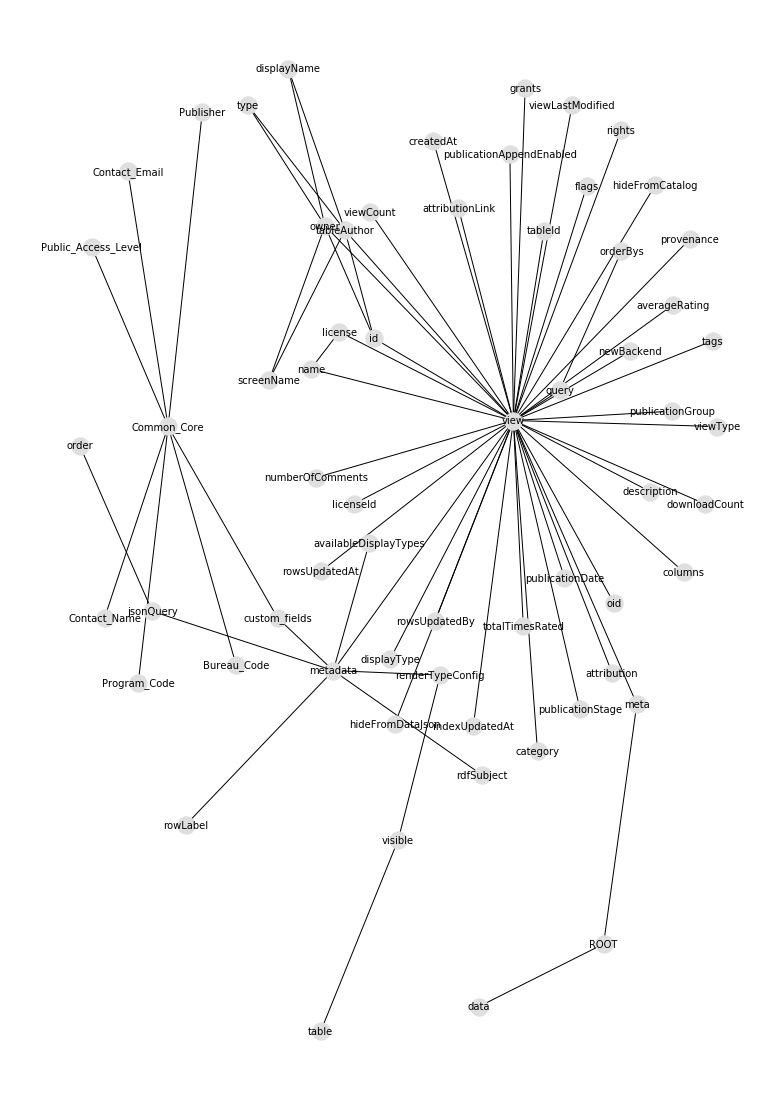

In [19]:
plt.figure(figsize=(10, 15))
nx.draw(
    G, with_labels=True, node_color="#dfdfdf", font_size=10,  
    pos=nx.spring_layout(G, scale=.5, k=0.5)
)

In [20]:
xnd(data_norm, type=xnd_type)

ValueError: missing typedef for key 'list'

In [21]:
%load_ext version_information
%version_information xnd, importnb, matplotlib

Software versions
Python 3.6.0 64bit [GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
IPython 6.4.0
OS Linux 4.13.0 45 generic x86_64 with debian stretch sid
xnd 0.2.0.dev3
importnb 0.3.1
matplotlib 2.1.1
Fri Jun 15 18:27:14 2018 EDT